<a href="https://colab.research.google.com/github/prann2229/actions-learning-pathway/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip install scikit-learn==1.3.0

In [7]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['SepalLengthCm']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data Analysis

<Axes: >

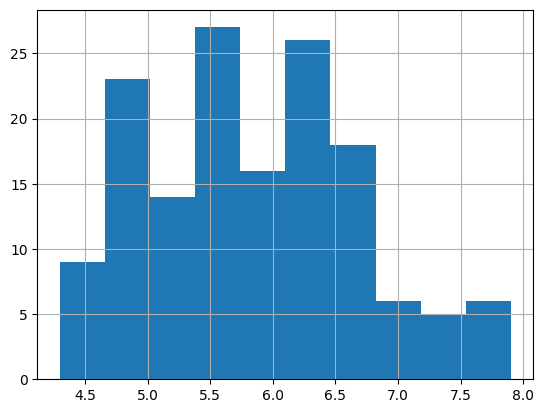

In [14]:
df['SepalLengthCm'].hist()

<Axes: >

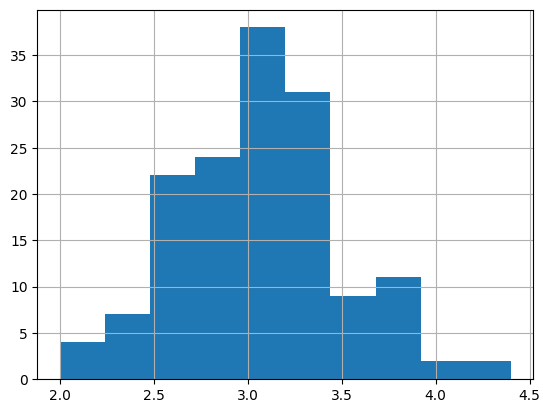

In [15]:
df['SepalWidthCm'].hist()

<Axes: >

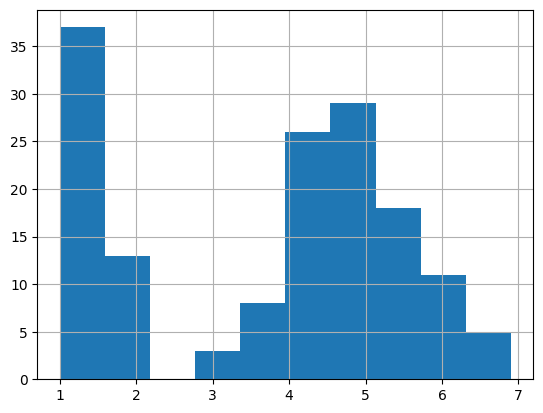

In [16]:
df['PetalLengthCm'].hist()

<Axes: >

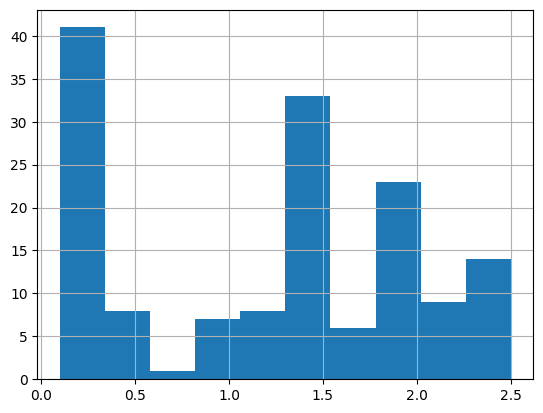

In [17]:
df['PetalWidthCm'].hist()

In [18]:
colors = ['red','orange','blue']
species = ['virginica','vericolor','setosa']

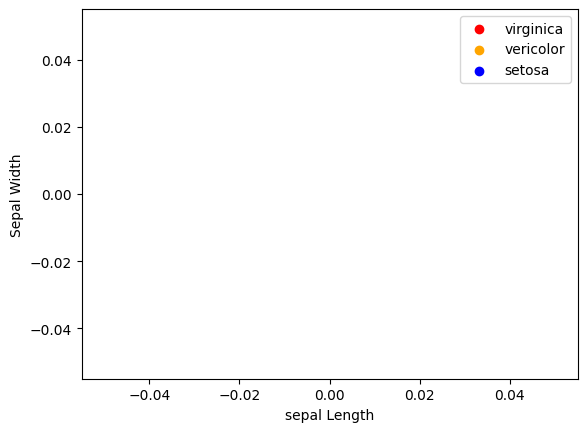

In [19]:
for i in range(3):
  x = df[df['Species']== species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
  plt.xlabel('sepal Length')
  plt.ylabel('Sepal Width')
  plt.legend()

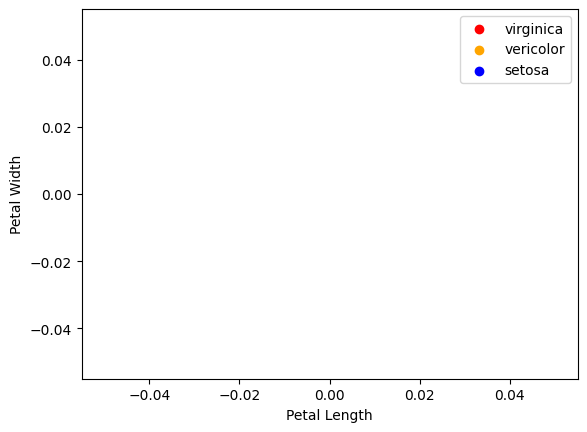

In [20]:
for i in range(3):
  x = df[df['Species']== species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.legend()


In [21]:
print(species)

['virginica', 'vericolor', 'setosa']


0 virginica
1 vericolor
2 setosa


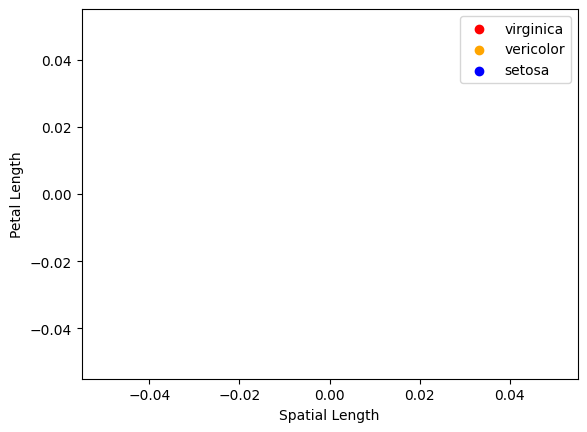

In [22]:
for i in range(3):
  print(i, species[i])
  plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
  plt.xlabel('Spatial Length')
  plt.ylabel('Petal Length')
  plt.legend()


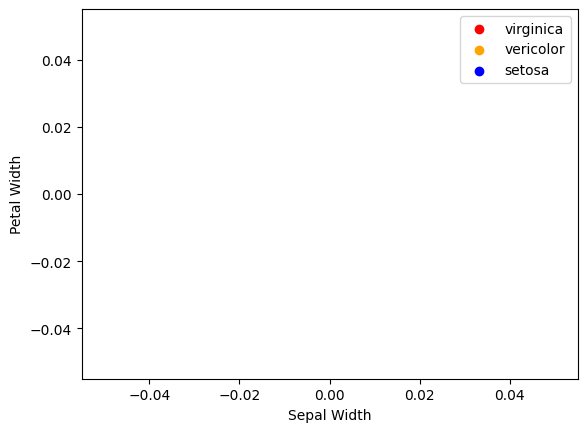

In [23]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c = colors[i], label = species[i])
  plt.xlabel('Sepal Width')
  plt.ylabel('Petal Width')
  plt.legend()


CORRELATION MATRIX

In [24]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

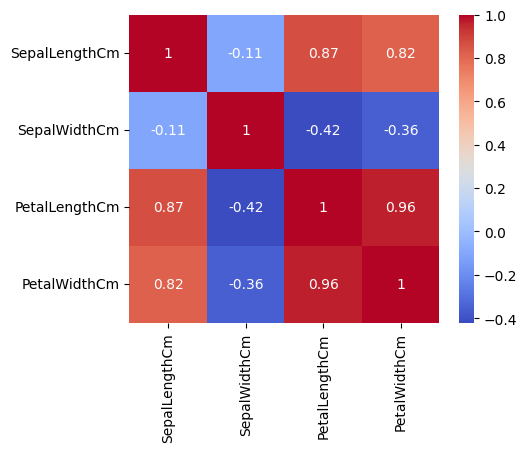

In [33]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

Model Training and Testing

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [40]:
model = LogisticRegression()
model.fit(x_train, y_train)
print('Logistic Regression Accuracy:', model.score(x_test, y_test)*100)

Logistic Regression Accuracy: 97.77777777777777


In [41]:
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [42]:
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 97.77777777777777


In [45]:
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print ("K-Nearest neighbors Accuracy: ", model.score(x_test, y_test)*100)

K-Nearest neighbors Accuracy:  97.77777777777777


In [46]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [47]:
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 97.77777777777777


In [49]:
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy:", model.score(x_test, y_test)* 100)

Decision Tree Accuracy: 97.77777777777777


In [50]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [52]:
print("Accuracy:", model.score(x_test, y_test)* 100)

Accuracy: 97.77777777777777


In [53]:
import pickle
filename = 'saved_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [54]:
import pickle

In [58]:
filename = 'saved_model_sav'
try:
  with open(filename, 'wb') as file:
      pickle.dump(model, file)
    print("Model saved succeddfully.")
except Exception as e:
    print(f'Error saving the model: {e}')


Model saved succeddfully.


In [59]:
load_model = pickle.load(open(filename, 'rb'))

In [60]:
load_model.predict([[6.0, 2.2, 4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [63]:
import sklearn
print(sklearn.__version__)

1.3.0


In [64]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
95,5.7,3.0,4.2,1.2
36,5.5,3.5,1.3,0.2
9,4.9,3.1,1.5,0.1
66,5.6,3.0,4.5,1.5
148,6.2,3.4,5.4,2.3


In [65]:
load_model.predict([[4,3,2,1]])

array(['Iris-setosa'], dtype=object)